In [1]:
#!pip install xgboost

In [2]:
# Initial imports
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the ventas_linea.csv dataset.
ventas_df = pd.read_csv('./final_ventas.csv')
ventas_df

,name,brand,month,qty,price_unit,total_sales
0,ALLENDE (QRO),SAM,December,253,3575.055344,904489.001910
1,ALLENDE (QRO),SAM,January,237,3510.548766,832000.057569
2,ALLENDE (QRO),SAM,November,190,3891.198695,741901.208609
3,ALLENDE (QRO),SAM,September,182,4025.918610,729146.389795
4,ALLENDE (QRO),SAM,May,140,4572.413284,640137.859691
...,...,...,...,...,...,...
3461,BOULEVARES (QRO),I-MOBIL,July,1,240.517241,240.517241
3462,PARQUE (QRO),I-MOBIL,July,1,240.517241,240.517241
3463,ALAMEDA (QRO),I-MOBIL,July,1,240.517241,240.517241
3464,PARQUE (CELAYA),I-MOBIL,May,1,240.517241,240.517241


In [4]:
# Convert categorical features to one-hot encoding
ventas_df = pd.get_dummies(ventas_df, columns=["name", "brand", "month"])

# Split the data into dependent variable y and independent variables X
y = ventas_df["qty"]
X = ventas_df.drop(columns=["qty", "total_sales", "price_unit"])
X

,name_ALAMEDA (QRO),name_ALLENDE (CELAYA),name_ALLENDE (QRO),name_ANDADOR (CELAYA),name_ANTEA (QRO),name_BOULEVARES (QRO),name_CONSTITUYENTES (QRO),name_CORREGIDORA 2 (QRO),name_CORREGIDORA 3 (QRO),name_CORREGIDORA 4 (QRO),...,month_August,month_December,month_February,month_January,month_July,month_June,month_May,month_November,month_October,month_September
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3463,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
X1 = X.rename(columns={
'name_ALAMEDA (QRO)': 'Alameda (QRO)',
'name_ALLENDE (CELAYA)': 'Allende (CELAYA)',
'name_ALLENDE (QRO)': 'Allende (QRO)',
'name_ANDADOR (CELAYA)': 'Andador (CELAYA)',
'name_ANTEA (QRO)': 'Antea (QRO)',
'name_BOULEVARES (QRO)': 'Boulevares (QRO)',
'name_CONSTITUYENTES (QRO)': 'Constituyentes (QRO)',
'name_CORREGIDORA 2 (QRO)': 'Corregidora 2 (QRO)',
'name_CORREGIDORA 3 (QRO)': 'Corregidora 3 (QRO)',
'name_CORREGIDORA 4 (QRO)': 'Corregidora 4 (QRO)',
'name_FIESTA (IRAPUATO)': 'Fiesta (IRAPUATO)',
'name_GALERIAS (QRO)': 'Galerias (QRO)',
'name_GUERRERO (QRO)': 'Guerrero (QRO)',
'name_HIDALGO (CELAYA)': 'Hidalgo (CELAYA)',
'name_HIDALGO 2 (CELAYA)': 'Hidalgo 2 (CELAYA)',
'name_LA CRUZ (QRO)': 'La Cruz (QRO)',
'name_LA VICTORIA (QRO)': 'La Victoria (QRO)',
'name_LEON CENTRO (LEON)': 'Leon Centro (LEON)',
'name_MADERO (LEON)': 'Madero (LEON)',
'name_MADERO (QRO)': 'Madero (QRO)',
'name_MAYOREO (QRO)': 'Mayoreo (QRO)',
'name_OBREGON (LEON)': 'Obregon (LEON)',
'name_PARQUE (CELAYA)': 'Parque (CELAYA)',
'name_PARQUE (QRO)': 'Parque (QRO)',
'name_PLAZA MAYOR (LEON)': 'Plaza Mayor (LEON)',
'name_PLAZA PATIO (QRO)': 'Plaza Patio (QRO)',
'name_PORTAL (QRO)': 'Portal (QRO)',
'name_URBAN (QRO)': 'Urban (QRO)',
'name_VALLARTA (VTA)': 'Vallarta (VTA)',
'name_VIA ALTA SUR (LEON)': 'Via Alta Sur (LEON)',
'brand_ACER': 'Acer',
'brand_ALC': 'Alc',
'brand_ALCATEL': 'Alcatel',
'brand_APPLE': 'Apple',
'brand_BLU': 'Blu',
'brand_CORN': 'Corn',
'brand_DASH': 'Dash',
'brand_DOPPIO': 'Doppio',
'brand_EPIK': 'Epik',
'brand_HISENSE': 'Hisense',
'brand_HONOR': 'Honor',
'brand_HUAWEI': 'Huawei',
'brand_I-MOBIL': 'I-Mobil',
'brand_INFINITI' : 'Infiniti',
'brand_KODAK': 'Kodak',
'brand_LANIX': 'Lanix',
'brand_LG': 'LG',
'brand_MOTO': 'Moto',
'brand_MOTOROLA': 'Motorola',
'brand_NOKIA': 'Nokia',
'brand_ONEPLUS': 'OnePlus',
'brand_OPPO': 'Oppo',
'brand_REALME': 'Realme',
'brand_SAM': 'Sam',
'brand_SAMSUNG': 'Samsung',
'brand_SENWA': 'Senwa',
'brand_SKY': 'Sky',
'brand_SOYEALINK': 'Soyealink',
'brand_TCL': 'TCL',
'brand_VIVO': 'Vivo',
'brand_XIAOMI': 'Xiaomi',
'brand_ZTE': 'ZTE',
'month_April': 'Apr',
'month_August': 'Aug',
'month_December': 'Dec',
'month_February': 'Feb',
'month_January': 'Jan',
'month_July': 'Jul',
'month_June': 'Jun',
'month_May': 'May',
'month_November': 'Nov',
'month_October': 'Oct',
'month_September':'Sep'
}) 
X1

,Alameda (QRO),Allende (CELAYA),Allende (QRO),Andador (CELAYA),Antea (QRO),Boulevares (QRO),Constituyentes (QRO),Corregidora 2 (QRO),Corregidora 3 (QRO),Corregidora 4 (QRO),...,Aug,Dec,Feb,Jan,Jul,Jun,May,Nov,Oct,Sep
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3463,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [6]:
print(X1.columns)

Index(['Alameda (QRO)', 'Allende (CELAYA)', 'Allende (QRO)',
       'Andador (CELAYA)', 'Antea (QRO)', 'Boulevares (QRO)',
       'Constituyentes (QRO)', 'Corregidora 2 (QRO)', 'Corregidora 3 (QRO)',
       'Corregidora 4 (QRO)', 'Fiesta (IRAPUATO)', 'Galerias (QRO)',
       'Guerrero (QRO)', 'Hidalgo (CELAYA)', 'Hidalgo 2 (CELAYA)',
       'La Cruz (QRO)', 'La Victoria (QRO)', 'Leon Centro (LEON)',
       'Madero (LEON)', 'Madero (QRO)', 'Mayoreo (QRO)', 'Obregon (LEON)',
       'Parque (CELAYA)', 'Parque (QRO)', 'Plaza Mayor (LEON)',
       'Plaza Patio (QRO)', 'Portal (QRO)', 'Urban (QRO)', 'Vallarta (VTA)',
       'Via Alta Sur (LEON)', 'Acer', 'Alc', 'Alcatel', 'Apple', 'Blu', 'Corn',
       'Dash', 'Doppio', 'Epik', 'Hisense', 'Honor', 'Huawei', 'I-Mobil',
       'Infiniti', 'Kodak', 'Lanix', 'LG', 'Moto', 'Motorola', 'Nokia',
       'OnePlus', 'Oppo', 'Realme', 'Sam', 'Samsung', 'Senwa', 'Sky',
       'Soyealink', 'TCL', 'Vivo', 'Xiaomi', 'ZTE', 'Apr', 'Aug', 'Dec', 'Feb',
     

### LInear Regression

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the trained model on the testing set
y_pred = model.predict(X_test)


In [8]:
# Evaluate the model using MSE, RMSE, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)

MSE: 2.576517524257217e+21
RMSE: 50759408233.914795
R-squared: -6.36392243728092e+18


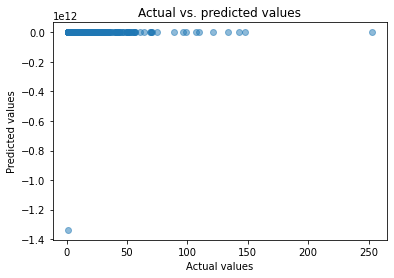

In [9]:
# Make predictions on new data
plt.scatter(y_test, y_pred, alpha=0.5)

# Set the axis labels
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. predicted values')
plt.show()

### Random Forest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model and fit it to the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the trained model on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [11]:

print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MSE: 131.10976772334294
RMSE: 11.450317363433335
R-squared: 0.6761627333383604


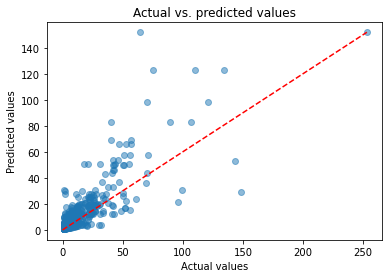

In [12]:
# Make predictions on new data
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect correlation
plt.plot([0, max(y_test)], [0, max(y_pred)], '--', color='red')

# Set the axis labels
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. predicted values')
plt.show()

### XGBoost regression

In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regression model and fit it to the training data
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions using the trained model on the testing set
y_pred = model.predict(X_test)
y_pred

array([ 3.36453176e+00,  1.42348108e+01,  1.90099466e+00,  3.93351579e+00,
        3.73245049e+00,  1.11287200e+00,  1.66842422e+01,  3.39636192e+01,
        3.67250872e+00,  3.86426735e+01,  1.18868607e+02,  1.49915159e+00,
        1.02511177e+01,  8.89982605e+00,  3.89438319e+00,  4.47246933e+00,
        3.57753932e-01, -4.49205875e-01,  2.74829769e+00,  7.50130272e+00,
        3.42082787e+00,  8.13223839e+00,  4.16144037e+00,  3.30219340e+00,
        5.06116962e+00,  2.75029373e+00,  2.67518282e+00,  9.25736904e+00,
        2.53779888e+01, -3.04303735e-01,  1.90829587e+00,  4.02480030e+00,
        2.35600300e+01,  4.58719788e+01,  6.51753426e+00,  4.57682467e+00,
        2.29798079e+00,  8.67749214e-01, -1.73025239e+00, -1.10285306e+00,
       -2.18025908e-01,  4.74407234e+01,  2.67535000e+01,  1.11531086e+01,
        2.71384072e+00,  3.71654224e+00,  4.10376072e+00,  8.60063493e-01,
        4.72215509e+00,  2.40440682e-01,  2.86889529e+00,  3.55163813e+00,
        7.93978643e+00,  

In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 105.98543913786135
RMSE: 10.294922978724093
R-squared: 0.7382190853334275


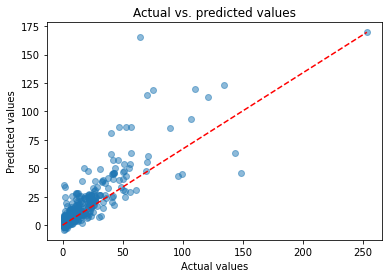

In [15]:
# Make predictions on new data
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line showing perfect correlation
plt.plot([0, max(y_test)], [0, max(y_pred)], '--', color='red')

# Set the axis labels
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. predicted values')
plt.show()

In [16]:
selected_features = ['Alameda (QRO)', 'Allende (CELAYA)', 'Allende (QRO)',
       'Andador (CELAYA)', 'Antea (QRO)', 'Boulevares (QRO)',
       'Constituyentes (QRO)', 'Corregidora 2 (QRO)', 'Corregidora 3 (QRO)',
       'Corregidora 4 (QRO)', 'Fiesta (IRAPUATO)', 'Galerias (QRO)',
       'Guerrero (QRO)', 'Hidalgo (CELAYA)', 'Hidalgo 2 (CELAYA)',
       'La Cruz (QRO)', 'La Victoria (QRO)', 'Leon Centro (LEON)',
       'Madero (LEON)', 'Madero (QRO)', 'Mayoreo (QRO)', 'Obregon (LEON)',
       'Parque (CELAYA)', 'Parque (QRO)', 'Plaza Mayor (LEON)',
       'Plaza Patio (QRO)', 'Portal (QRO)', 'Urban (QRO)', 'Vallarta (VTA)',
       'Via Alta Sur (LEON)', 'Acer', 'Alc', 'Alcatel', 'Apple', 'Blu',
       'Corn', 'Dash', 'Doppio', 'Epik', 'Hisense', 'Honor', 'Huawei',
       'I-Mobil', 'Infiniti', 'Kodak', 'Lanix', 'LG', 'Moto', 'Motorola',
       'Nokia', 'OnePlus', 'Oppo', 'Realme', 'Sam', 'Samsung', 'Senwa', 'Sky',
       'Soyealink', 'TCL', 'Vivo', 'Xiaomi', 'ZTE', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'May', 'Nov', 'Oct', 'Sep']

In [17]:
# select only relevant columns from ventas_df
X1 = X1[selected_features]

# use the trained model to make predictions on new data
predicted_sales = model.predict(X)

# add the predicted sales as a new column to the new data
X1['predicted_sales'] = predicted_sales
predicted_sales

array([169.70322   , 226.35962   , 178.87573   , ...,   2.098968  ,
         0.35775393,   4.9041705 ], dtype=float32)

In [34]:
# get user input for branch and month
#branch = input("Enter branch name: ")
#month = input("Enter month: ")
#brand = input("Enter brand: ")
selected_features_branches = ['Alameda (QRO)', 'Allende (CELAYA)', 'Allende (QRO)',
       'Andador (CELAYA)', 'Antea (QRO)', 'Boulevares (QRO)',
       'Constituyentes (QRO)', 'Corregidora 2 (QRO)', 'Corregidora 3 (QRO)',
       'Corregidora 4 (QRO)', 'Fiesta (IRAPUATO)', 'Galerias (QRO)',
       'Guerrero (QRO)', 'Hidalgo (CELAYA)', 'Hidalgo 2 (CELAYA)',
       'La Cruz (QRO)', 'La Victoria (QRO)', 'Leon Centro (LEON)',
       'Madero (LEON)', 'Madero (QRO)', 'Mayoreo (QRO)', 'Obregon (LEON)',
       'Parque (CELAYA)', 'Parque (QRO)', 'Plaza Mayor (LEON)',
       'Plaza Patio (QRO)', 'Portal (QRO)', 'Urban (QRO)', 'Vallarta (VTA)',
       'Via Alta Sur (LEON)']
selected_features_brands = ['Acer', 'Alc', 'Alcatel', 'Apple', 'Blu',
       'Corn', 'Dash', 'Doppio', 'Epik', 'Hisense', 'Honor', 'Huawei',
       'I-Mobil', 'Infiniti', 'Kodak', 'Lanix', 'LG', 'Moto', 'Motorola',
       'Nokia', 'OnePlus', 'Oppo', 'Realme', 'Sam', 'Samsung', 'Senwa', 'Sky',
       'Soyealink', 'TCL', 'Vivo', 'Xiaomi', 'ZTE']
selected_features_months = ['Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'May', 'Nov', 'Oct', 'Sep']

for it_branch in selected_features_branches:
    for it_brand in selected_features_brands:
        for it_month in selected_features_months:
            # filter the X1 dataframe based on user input
            filtered_X1 = X1[(X1[it_branch] == 1) & (X1[it_month] == 1) & (X1[it_brand] == 1)]

            # check if there is any data found for the current iteration
            if not filtered_X1.empty:
                predicted_sales = round(filtered_X1['predicted_sales'].values[0])
                print(f"Predicted sales for {it_brand} at {it_branch} during {it_month}: {predicted_sales} phones")
            else:
                print(f"No data found for {it_brand} at {it_branch} during {it_month}")

No data found for Acer at Alameda (QRO) during Apr
No data found for Acer at Alameda (QRO) during Aug
Predicted sales for Acer at Alameda (QRO) during Dec: 2 phones
No data found for Acer at Alameda (QRO) during Feb
No data found for Acer at Alameda (QRO) during Jan
No data found for Acer at Alameda (QRO) during Jul
No data found for Acer at Alameda (QRO) during Jun
No data found for Acer at Alameda (QRO) during May
No data found for Acer at Alameda (QRO) during Nov
No data found for Acer at Alameda (QRO) during Oct
No data found for Acer at Alameda (QRO) during Sep
No data found for Alc at Alameda (QRO) during Apr
No data found for Alc at Alameda (QRO) during Aug
No data found for Alc at Alameda (QRO) during Dec
No data found for Alc at Alameda (QRO) during Feb
No data found for Alc at Alameda (QRO) during Jan
Predicted sales for Alc at Alameda (QRO) during Jul: 2 phones
No data found for Alc at Alameda (QRO) during Jun
No data found for Alc at Alameda (QRO) during May
No data found f

In [38]:
selected_features_branches = ['Alameda (QRO)', 'Allende (CELAYA)', 'Allende (QRO)',
       'Andador (CELAYA)', 'Antea (QRO)', 'Boulevares (QRO)',
       'Constituyentes (QRO)', 'Corregidora 2 (QRO)', 'Corregidora 3 (QRO)',
       'Corregidora 4 (QRO)', 'Fiesta (IRAPUATO)', 'Galerias (QRO)',
       'Guerrero (QRO)', 'Hidalgo (CELAYA)', 'Hidalgo 2 (CELAYA)',
       'La Cruz (QRO)', 'La Victoria (QRO)', 'Leon Centro (LEON)',
       'Madero (LEON)', 'Madero (QRO)', 'Mayoreo (QRO)', 'Obregon (LEON)',
       'Parque (CELAYA)', 'Parque (QRO)', 'Plaza Mayor (LEON)',
       'Plaza Patio (QRO)', 'Portal (QRO)', 'Urban (QRO)', 'Vallarta (VTA)',
       'Via Alta Sur (LEON)']
selected_features_brands = ['Acer', 'Alc', 'Alcatel', 'Apple', 'Blu',
       'Corn', 'Dash', 'Doppio', 'Epik', 'Hisense', 'Honor', 'Huawei',
       'I-Mobil', 'Infiniti', 'Kodak', 'Lanix', 'LG', 'Moto', 'Motorola',
       'Nokia', 'OnePlus', 'Oppo', 'Realme', 'Sam', 'Samsung', 'Senwa', 'Sky',
       'Soyealink', 'TCL', 'Vivo', 'Xiaomi', 'ZTE']
selected_features_months = ['Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'May', 'Nov', 'Oct', 'Sep']

for it_branch in selected_features_branches:
    for it_brand in selected_features_brands:
        for it_month in selected_features_months:
            # filter the X1 dataframe based on user input
            filtered_X1 = X1[(X1[it_branch] == 1) & (X1[it_month] == 1) & (X1[it_brand] == 1)]

            # check if there is any data found for the current iteration
            if not filtered_X1.empty:
                predicted_sales = round(filtered_X1['predicted_sales'].values[0])
                print(f"{it_brand}, {it_branch}, {it_month}: {predicted_sales}")
            else:
                print(f"{it_brand},{it_branch},{it_month}")

Acer,Alameda (QRO),Apr
Acer,Alameda (QRO),Aug
Acer, Alameda (QRO), Dec: 2
Acer,Alameda (QRO),Feb
Acer,Alameda (QRO),Jan
Acer,Alameda (QRO),Jul
Acer,Alameda (QRO),Jun
Acer,Alameda (QRO),May
Acer,Alameda (QRO),Nov
Acer,Alameda (QRO),Oct
Acer,Alameda (QRO),Sep
Alc,Alameda (QRO),Apr
Alc,Alameda (QRO),Aug
Alc,Alameda (QRO),Dec
Alc,Alameda (QRO),Feb
Alc,Alameda (QRO),Jan
Alc, Alameda (QRO), Jul: 2
Alc,Alameda (QRO),Jun
Alc,Alameda (QRO),May
Alc,Alameda (QRO),Nov
Alc,Alameda (QRO),Oct
Alc,Alameda (QRO),Sep
Alcatel, Alameda (QRO), Apr: 2
Alcatel, Alameda (QRO), Aug: 2
Alcatel,Alameda (QRO),Dec
Alcatel,Alameda (QRO),Feb
Alcatel,Alameda (QRO),Jan
Alcatel, Alameda (QRO), Jul: 2
Alcatel, Alameda (QRO), Jun: 2
Alcatel,Alameda (QRO),May
Alcatel,Alameda (QRO),Nov
Alcatel,Alameda (QRO),Oct
Alcatel,Alameda (QRO),Sep
Apple,Alameda (QRO),Apr
Apple,Alameda (QRO),Aug
Apple,Alameda (QRO),Dec
Apple,Alameda (QRO),Feb
Apple,Alameda (QRO),Jan
Apple, Alameda (QRO), Jul: 3
Apple,Alameda (QRO),Jun
Apple,Alameda (Q

In [40]:
from tabulate import tabulate

table_data = []

for it_branch in selected_features_branches:
    for it_brand in selected_features_brands:
        row_data = [it_brand, it_branch]
        for it_month in selected_features_months:
            # filter the X1 dataframe based on user input
            filtered_X1 = X1[(X1[it_branch] == 1) & (X1[it_month] == 1) & (X1[it_brand] == 1)]

            # check if there is any data found for the current iteration
            if not filtered_X1.empty:
                predicted_sales = round(filtered_X1['predicted_sales'].values[0])
                row_data.append(str(predicted_sales))
            else:
                row_data.append("0")

        table_data.append(row_data)

# print the table
headers = ["Brand/Branch"] + selected_features_months
print(tabulate(table_data, headers=headers, tablefmt="grid"))


+-----------+----------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|           | Brand/Branch         |   Apr |   Aug |   Dec |   Feb |   Jan |   Jul |   Jun |   May |   Nov |   Oct |   Sep |
+===========+======================+=======+=======+=======+=======+=======+=======+=======+=======+=======+=======+=======+
| Acer      | Alameda (QRO)        |     0 |     0 |     2 |     0 |     0 |     0 |     0 |     0 |     0 |     0 |     0 |
+-----------+----------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Alc       | Alameda (QRO)        |     0 |     0 |     0 |     0 |     0 |     2 |     0 |     0 |     0 |     0 |     0 |
+-----------+----------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Alcatel   | Alameda (QRO)        |     2 |     2 |     0 |     0 |     0 |     2 |     2 |     0 |     0 |     0 |     0 |


In [41]:
import pandas as pd

selected_features_branches = ['Alameda (QRO)', 'Allende (CELAYA)', 'Allende (QRO)',
       'Andador (CELAYA)', 'Antea (QRO)', 'Boulevares (QRO)',
       'Constituyentes (QRO)', 'Corregidora 2 (QRO)', 'Corregidora 3 (QRO)',
       'Corregidora 4 (QRO)', 'Fiesta (IRAPUATO)', 'Galerias (QRO)',
       'Guerrero (QRO)', 'Hidalgo (CELAYA)', 'Hidalgo 2 (CELAYA)',
       'La Cruz (QRO)', 'La Victoria (QRO)', 'Leon Centro (LEON)',
       'Madero (LEON)', 'Madero (QRO)', 'Mayoreo (QRO)', 'Obregon (LEON)',
       'Parque (CELAYA)', 'Parque (QRO)', 'Plaza Mayor (LEON)',
       'Plaza Patio (QRO)', 'Portal (QRO)', 'Urban (QRO)', 'Vallarta (VTA)',
       'Via Alta Sur (LEON)']
selected_features_brands = ['Acer', 'Alc', 'Alcatel', 'Apple', 'Blu',
       'Corn', 'Dash', 'Doppio', 'Epik', 'Hisense', 'Honor', 'Huawei',
       'I-Mobil', 'Infiniti', 'Kodak', 'Lanix', 'LG', 'Moto', 'Motorola',
       'Nokia', 'OnePlus', 'Oppo', 'Realme', 'Sam', 'Samsung', 'Senwa', 'Sky',
       'Soyealink', 'TCL', 'Vivo', 'Xiaomi', 'ZTE']
selected_features_months = ['Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'May', 'Nov', 'Oct', 'Sep']

output_list = []

for it_branch in selected_features_branches:
    for it_brand in selected_features_brands:
        for it_month in selected_features_months:
            # filter the X1 dataframe based on user input
            filtered_X1 = X1[(X1[it_branch] == 1) & (X1[it_month] == 1) & (X1[it_brand] == 1)]

            # check if there is any data found for the current iteration
            if not filtered_X1.empty:
                predicted_sales = round(filtered_X1['predicted_sales'].values[0])
                output_list.append([it_brand, it_branch, it_month, predicted_sales])
            else:
                output_list.append([it_brand, it_branch, it_month, 0])

# create a dataframe from the list
df = pd.DataFrame(output_list, columns=['Brand', 'Branch', 'Month', 'Predicted Sales'])

print(df)


      Brand               Branch Month  Predicted Sales
0      Acer        Alameda (QRO)   Apr                0
1      Acer        Alameda (QRO)   Aug                0
2      Acer        Alameda (QRO)   Dec                2
3      Acer        Alameda (QRO)   Feb                0
4      Acer        Alameda (QRO)   Jan                0
...     ...                  ...   ...              ...
10555   ZTE  Via Alta Sur (LEON)   Jun                2
10556   ZTE  Via Alta Sur (LEON)   May                3
10557   ZTE  Via Alta Sur (LEON)   Nov                2
10558   ZTE  Via Alta Sur (LEON)   Oct                3
10559   ZTE  Via Alta Sur (LEON)   Sep                2

[10560 rows x 4 columns]


In [43]:
df.to_csv('tableaumachinelearning.csv', index=False)